In [1]:
import keras as k
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from numpy import load

In [2]:
aug_train = ImageDataGenerator(rescale= 1.0/255.,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

aug_test  = ImageDataGenerator(rescale= 1.0/255.)

In [6]:
print("loading data")
#data = load("../Dataset/data/data_"+ str(i+1) +".npy")
data = load("../Dataset/data/data_45.npy")
print("loading labels")
#labels = load("../Dataset/data/labels_"+ str(i+1) +".npy")
labels = load("../Dataset/data/labels_45.npy")

from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.1, stratify=labels, random_state=42,shuffle = True)

del data, labels

model = load_model('logs/model-1680359862.h5')

model.summary()

loading data
loading labels
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)           

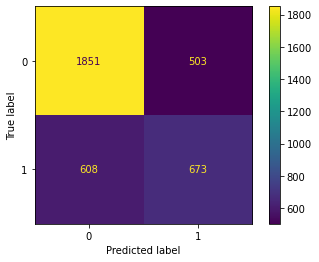

In [7]:
predY = model.predict(trainX)
cm = confusion_matrix(trainY, predY.round())
cm_display = ConfusionMatrixDisplay(cm).plot()

del predY

In [8]:
model.evaluate(trainX, trainY, steps=len(trainY), verbose=1)

3635/3635 [==============================] - 10s 3ms/step - loss: 25.2424 - accuracy: 0.6944


[25.242435455322266, 0.6943603754043579]